# 統計指標實作範例
## 常見於迴歸問題的評估指標
* 平均絕對誤差 - Mean Absolute Error (MAE)
* 平均平方誤差(均方差) - Mean Squared Error (MSE)

## 常見於分類問題的指標
* Binary Cross Entropy (CE)

##### 後面的課程還會有更詳細的說明

# [教學目標]
- 開始的第一堂課 : 我們先一些機器學習的基礎開始, 需要用到一些 Python 語法  
- 如果不熟 Python, 但是至少熟悉過一門語言, 可以從這些範例開始熟悉
- 所謂評價函數 (Metric), 就是機器學習的計分方式, 範例會展示平均絕對誤差 (MAE) 的寫法
- 我們來了解意義並寫作一個函數吧!!

# [範例重點]
- 複習 / 熟悉 Python 載入套件的語法, 了解什麼是代稱 (In[1], Out[1])
- 了解 Python 如何使用 Numpy 套件, 計算我們所需要的數值與繪圖 (In[2], Out[2], In[3], Out[3])
- 如何寫作平均絕對誤差 (MAE) 函數 (In[4], Out[4])

In [3]:
# import 是 Python 載入套件的基本語法 (類似 C 語言的 include), 後面接要載入的套件
# import AAAAA as BB, 其中 BB 是代稱, 表示除了載入 AAAAA 之外, 之後都可以用 BB 代替 AAAAA 這個名稱
# 常用套件往往有其對應代稱, numpy的代稱是np, pandas的代稱是pd, matplotlib.pyplot的代稱是plt
# numpy 常用於數值/陣列運算, pandas 擅長資料格式的調整, matplotlib 擅長繪圖
import numpy as np
import matplotlib.pyplot as plt

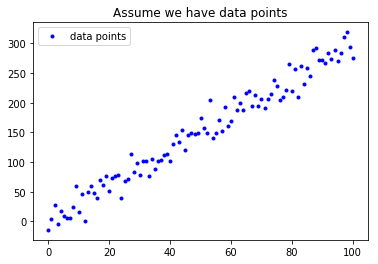

In [5]:
# Python 的變數不須宣告, 可能是文字, 數值, 陣列, 甚至是物件, 對初學者來說這往往是最難接受的地方
# 主要是 Python 在大多數情況下, 可以由運算"猜"出你想要的型態, 我們由下列語法看看發生了什麼事吧
# w, b 是數值
w = 3
b = 0.5

# np.linspace 是 numpy.linspace 的意思
# np.linspace(0, 100, 101)是指 0~100 劃分成 101 個刻度(含頭尾), 所也就是 0, 1, 2,...,100 這 101 個數
# 這時候, x_lin 因為要記錄不只一個數, 因為 np.linspace() 傳回的是一個 Array, 所以 x_lin 就變成 Array 了
x_lin = np.linspace(0, 100, 101)

# np.random.randn() 就是 numpy.random.randn(), 會隨機傳回標準常態分布的取樣值
# np.random.randn(101) 表示取樣了101次, 型態是 Array, 所以其他 + 與 * 的部分都是 Array 的加與乘, 一行就計算了101筆資料
# 所以最後的結果 y, 也是一個長度 101 的 Array
y = (x_lin + np.random.randn(101) * 5) * w + b

# 這邊就是將 x_lin 以及剛剛算完的 y, 當作座標值, 將101個點在平面上畫出來
# b. : b 就是 blue, 點(.) 就是最小單位的形狀, 詳細可以查 matplotlib 的官方說明
plt.plot(x_lin, y, 'b.', label = 'data points')
plt.title("Assume we have data points")
plt.legend(loc = 2)
plt.show()

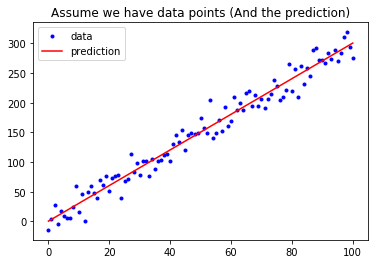

In [6]:
# 這邊的 y_hat, 就沒有隨機的部分了, 也就是下圖中的紅色實線部分
y_hat = x_lin * w + b
plt.plot(x_lin, y, 'b.', label = 'data')
# 上面的 'b.' 是藍色點狀, 下面的 'r-' 是紅色線狀, label 是圖示上的名稱
plt.plot(x_lin, y_hat, 'r-', label = 'prediction')
plt.title("Assume we have data points (And the prediction)")
plt.legend(loc = 2)
plt.show()

In [9]:
# Python 的函數是另一個新手上手的困難點, 由def開頭, 依序是函數名稱 / 輸入值, 冒號(:)結尾
# 最難讓人習慣的是 Python 的函式與條件判斷, 前後都沒有大括弧(其他程式常見), 而是以四格空白縮排來取代
# 以本例來說, mean_absolute_error 這個函數的定義範圍到 return mae 為止, 因為中間都是縮排, 而 """ 是多行註解(井號是單行註解)
# 函數中, sum(), abs(), len() 都是 Python 原有的方法, 因此可以直接呼叫
def mean_absolute_error(y, yp):
    """
    計算 MAE
    Args:
        - y: 實際值
        - yp: 預測值
    Return:
        - mae: MAE
    """
    # MAE : 將兩個陣列相減後, 取絕對值(abs), 再將整個陣列加總成一個數字(sum), 最後除以y的長度(len), 因此稱為"平均絕對誤差"
    mae = MAE = sum(abs(y - yp)) / len(y)
    return mae

# 呼叫上述函式, 傳回 y(藍點高度)與 y_hat(紅線高度) 的 MAE
MAE = mean_absolute_error(y, y_hat)
print("The Mean absolute error is %.3f" % (MAE))

The Mean absolute error is 13.240


## 練習時間
#### 請寫一個函式用來計算 Mean Square Error
$ MSE = \frac{1}{n}\sum_{i=1}^{n}{(Y_i - \hat{Y}_i)^2} $

### Hint: [如何取平方](https://googoodesign.gitbooks.io/-ezpython/unit-1.html)

In [22]:
def mean_square_error(y,y_hat):
    n = len(y)
    mse = sum(y-y_hat)**2/n
    return mse
MSE = mean_square_error(y,y_hat)
print("The Mean absolute error is %.3f" % (MSE))

The Mean absolute error is 2.647


## 作業1：
請上 Kaggle, 在 Competitions 或 Dataset 中找一組競賽或資料並寫下：
1. 你選的這組資料為何重要
2. 資料從何而來 (tips: 譬如提供者是誰、以什麼方式蒐集)
3. 蒐集而來的資料型態為何
4. 這組資料想解決的問題如何評估

ANS
1. 利用簡單的病患資料，及可分類病患的心臟病屬性並加以控管防範，為當今醫學盡一份力。
2. 資料來源 Kaggle (https://www.kaggle.com/ronitf/heart-disease-uci) 
Creators: 
Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D. 
University Hospital, Zurich, Switzerland: William Steinbrunn, M.D. 
University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D. 
V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.Donor: David W. Aha (aha '@' ics.uci.edu) (714) 856-8779
屬於病理資料，從病患當中做檢測而來
3.  結構化: 數值、.CSV  303(病患)*14(因子)
4. Inspiration
Experiments with the Cleveland database have concentrated on simply attempting to 
distinguish presence (values 1,2,3,4) from absence (value 0).
See if you can find any other trends in heart data to predict certain 
cardiovascular events or find any clear indications of heart health.

最直覺的方式，進行回歸模型 fit ，評估方式 使用 AIC or BIC 或是用 LOOCV 
來進行預測模型的好壞


## 作業2：

想像你經營一個自由載客車隊，你希望能透過數據分析以提升業績，請你思考並描述你如何
規劃整體的分析/解決方案：
1. 核心問題為何 (tips：如何定義 「提升業績 & 你的假設」)
2. 資料從何而來 (tips：哪些資料可能會對你想問的問題產生影響 & 資料如何蒐集)
3. 蒐集而來的資料型態為何
4. 你要回答的問題，其如何評估 (tips：你的假設如何驗證)

ANS: 
情境架構: Ubus 數據分析師 目前握有資料 app 用戶資料 以及用戶每次叫車習慣
1. 定義該如何提升業績: a. 用戶增加  b. 用戶使用次數增加 

2. a. 市場調查或利用政府提供該縣市交通工具沒有機車或汽車，習慣搭乘大眾交通共
      具的人口
   b. 利用用戶資料，找出大多用戶習慣叫車的地區

3. a. 人口比例 結構化  b. 圖表 非結構化 

4. 依照分析結果，廣告投遞給符合(沒有交通工具，習慣搭乘大眾交通工具之人口，或依照原本
   用戶的資料相符者)，在提供熱區位置給司機等...試辦 1 個月
   看用戶數量以及使用次數是否提升
